In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [ ]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
IMG_CHANNELS = 3
IMG_ROWS = 224
IMG_COLS = 224

CLASSES = 2  # 자전거, 전기 자전거

In [ ]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 각 폴더에서 이미지 100개씩 불러오기
b_images = glob('/content/drive/MyDrive/CNN/b_e/b/*.jpg')[:100]
e_images = glob('/content/drive/MyDrive/CNN/b_e/e/*.jpg')[:100]

# 전체 이미지 경로 목록
all_images = b_images + e_images

# 이미지 불러오기 및 사이즈 조정
images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in all_images]

#  numpy 배열로 변환
image_vector = np.asarray([image.img_to_array(img) for img in images])


In [ ]:
image_vector[0]

array([[[103., 149., 110.],
        [ 98., 144.,  98.],
        [ 98., 147.,  92.],
        ...,
        [108., 184., 220.],
        [ 79., 138., 142.],
        [ 66., 151., 190.]],

       [[ 88., 135., 117.],
        [ 88., 133.,  78.],
        [ 64., 114.,  43.],
        ...,
        [ 46.,  99.,  81.],
        [ 35., 145., 204.],
        [195., 238., 255.]],

       [[ 90., 142., 104.],
        [ 73., 119.,  72.],
        [ 69., 116.,  46.],
        ...,
        [129., 193., 218.],
        [119., 196., 240.],
        [ 45., 121., 153.]],

       ...,

       [[103., 102., 107.],
        [139., 127., 131.],
        [132., 129., 124.],
        ...,
        [158., 166., 185.],
        [154., 163., 180.],
        [ 99., 103., 115.]],

       [[108., 109., 113.],
        [116., 115., 121.],
        [110., 104., 106.],
        ...,
        [136., 124., 126.],
        [142., 148., 160.],
        [ 81.,  89., 108.]],

       [[120., 115., 119.],
        [110., 111., 116.],
        [ 72.,  

In [ ]:
image_vector.shape

(200, 224, 224, 3)

In [ ]:
image_vector[0].shape

(224, 224, 3)

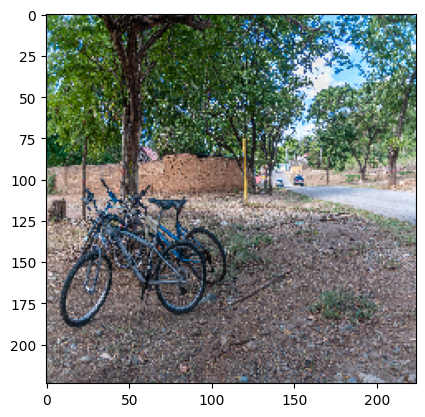

In [ ]:
plt.imshow(image_vector[0]/255)

In [ ]:
# y=[1] * 1000 + [0] * 1000
y=[1] * 100 + [0] * 100

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(160, 224, 224, 3)

In [ ]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
y_train[80]

array([0., 1.], dtype=float32)

In [ ]:
y_train[120]

array([1., 0.], dtype=float32)

In [ ]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 32)                12616736  
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
2/2 [==============================] - 9s 2s/step - loss: 34.5858 - accuracy: 0.5278 - val_loss: 1.5318 - val_accuracy: 0.6250
Epoch 2/5
2/2 [==============================] - 7s 921ms/step - loss: 1.5118 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.3750
Epoch 3/5
2/2 [==============================] - 6s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3750
Epoch 4/5
2/2 [==============================] - 8s 887ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.3750
Epoch 5/5
2/2 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3750


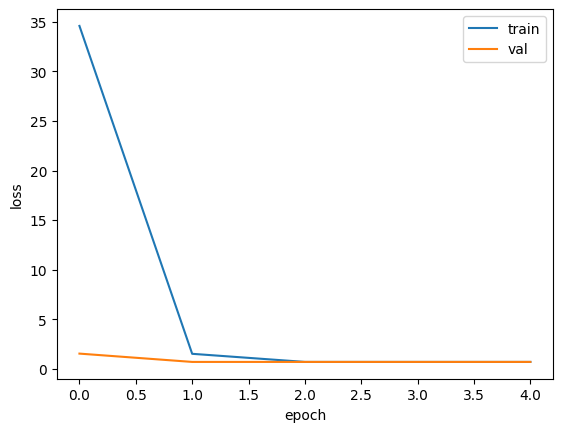

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

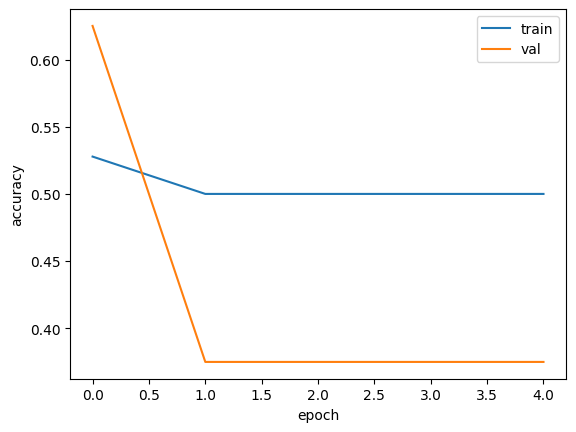

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 105ms/step - loss: 0.6931 - accuracy: 0.5500

Test loss: 0.6931031346321106
Test accuracy: 0.550000011920929
